In [1]:
#Ce projet consiste à analyser des données concernant certains facteurs pouvant influencer le bohneur dans un groupe d'individu
#comme par exemple la situation professionnelle ou le salaire.
#Ce dataset ce concentre sur un groupe d'individus venant des Etats-unis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
df = pd.read_csv("Kag_happiness_indicators.csv",sep=",")

In [2]:
df.columns
#Regardons quels colonnes sont disponibles dans ce dataset

Index(['Unnamed: 0', 'year', 'workstat', 'prestige', 'divorce', 'widowed',
       'educ', 'reg16', 'babies', 'preteen', 'teens', 'income', 'region',
       'attend', 'happy', 'owngun', 'tvhours', 'vhappy', 'mothfath16', 'black',
       'gwbush04', 'female', 'blackfemale', 'gwbush00', 'occattend',
       'regattend', 'y94', 'y96', 'y98', 'y00', 'y02', 'y04', 'y06', 'unem10'],
      dtype='object')

In [3]:
data = df.filter(items=['year', 'workstat', 'prestige', 'divorce', 'widowed','educ','babies', 'preteen', 'teens','income', 'region','happy', 'owngun', 'tvhours'])
#Prenons les colonnes qui nous intéresse puis regardons le contenu en prenant un echantillon de 10 personnes
data
#filteredData = data[(data['LotArea']<20000) & (data['Country']==France)]
#.hist(column="EducationField", by="Attrition")

,year,workstat,prestige,divorce,widowed,educ,babies,preteen,teens,income,region,happy,owngun,tvhours
0,1994,keeping house,46.0,NaN,iap,12.0,2.0,3.0,0.0,$10000 - 14999,middle atlantic,pretty happy,NaN,2.0
1,1994,working fulltime,22.0,no,iap,12.0,0.0,0.0,0.0,NaN,middle atlantic,very happy,NaN,3.0
2,1994,working fulltime,29.0,no,iap,12.0,0.0,0.0,0.0,$15000 - 19999,middle atlantic,pretty happy,iap,1.0
3,1994,working fulltime,42.0,yes,iap,8.0,0.0,0.0,0.0,$15000 - 19999,middle atlantic,not too happy,NaN,3.0
4,1994,working parttime,36.0,NaN,NaN,13.0,0.0,1.0,1.0,$10000 - 14999,middle atlantic,not too happy,iap,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17132,2006,keeping house,29.0,NaN,NaN,9.0,0.0,0.0,0.0,$3000 to 3999,pacific,pretty happy,iap,1.0
17133,2006,temp not working,51.0,NaN,iap,16.0,0.0,1.0,1.0,$25000 or more,pacific,pretty happy,NaN,1.0
17134,2006,retired,NaN,yes,NaN,8.0,0.0,0.0,0.0,$6000 to 6999,mountain,pretty happy,NaN,4.0
17135,2006,keeping house,20.0,no,iap,6.0,1.0,2.0,1.0,$6000 to 6999,mountain,not too happy,NaN,8.0


In [4]:
#Voyons maintenant la distribution des valeurs de la colonne "happy" à travers 9 régions des Etats-unies

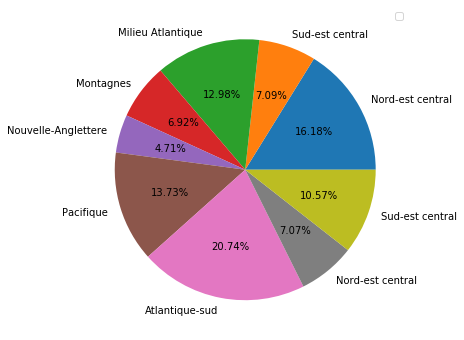

In [5]:
vh = data[(data['happy']=='very happy')]
x = vh.groupby('region').count()['happy']
plt.figure(figsize=(9,6))
plt.pie(x,autopct = lambda x: str(round(x, 2)) + '%', labels = ['Nord-est central', 'Sud-est central', 'Milieu Atlantique', 'Montagnes', 'Nouvelle-Anglettere', 'Pacifique', 'Atlantique-sud', 'Nord-est central', 'Sud-est central'])
plt.legend("")
#Les région Nord-est central, Atlantique-sud et Milieu Atlantique sont les régions où les personnes sont les plus heureuses

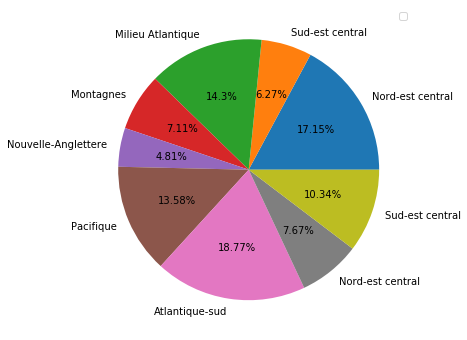

In [6]:
ph = data[(data['happy']=='pretty happy')]
x = ph.groupby('region').count()['happy']
plt.figure(figsize=(9,6))
plt.pie(x,autopct = lambda x: str(round(x, 2)) + '%', labels = ['Nord-est central', 'Sud-est central', 'Milieu Atlantique', 'Montagnes', 'Nouvelle-Anglettere', 'Pacifique', 'Atlantique-sud', 'Nord-est central', 'Sud-est central'])
plt.legend("") 
#Les région citées plus haut sont les régions où la majorité des personnes sont assez heureuses

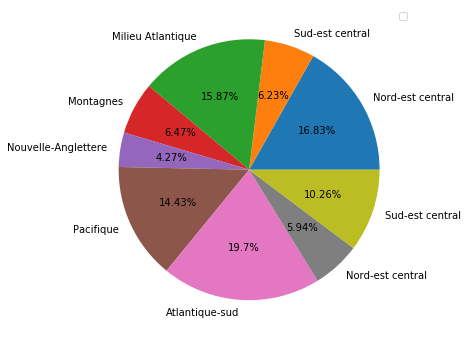

In [7]:
nth = data[(data['happy']=='not too happy')]
x = nth.groupby('region').count()['happy']
plt.figure(figsize=(9,6))
plt.pie(x,autopct = lambda x: str(round(x, 2)) + '%', labels = ['Nord-est central', 'Sud-est central', 'Milieu Atlantique', 'Montagnes', 'Nouvelle-Anglettere', 'Pacifique', 'Atlantique-sud', 'Nord-est central', 'Sud-est central'])
plt.legend("")

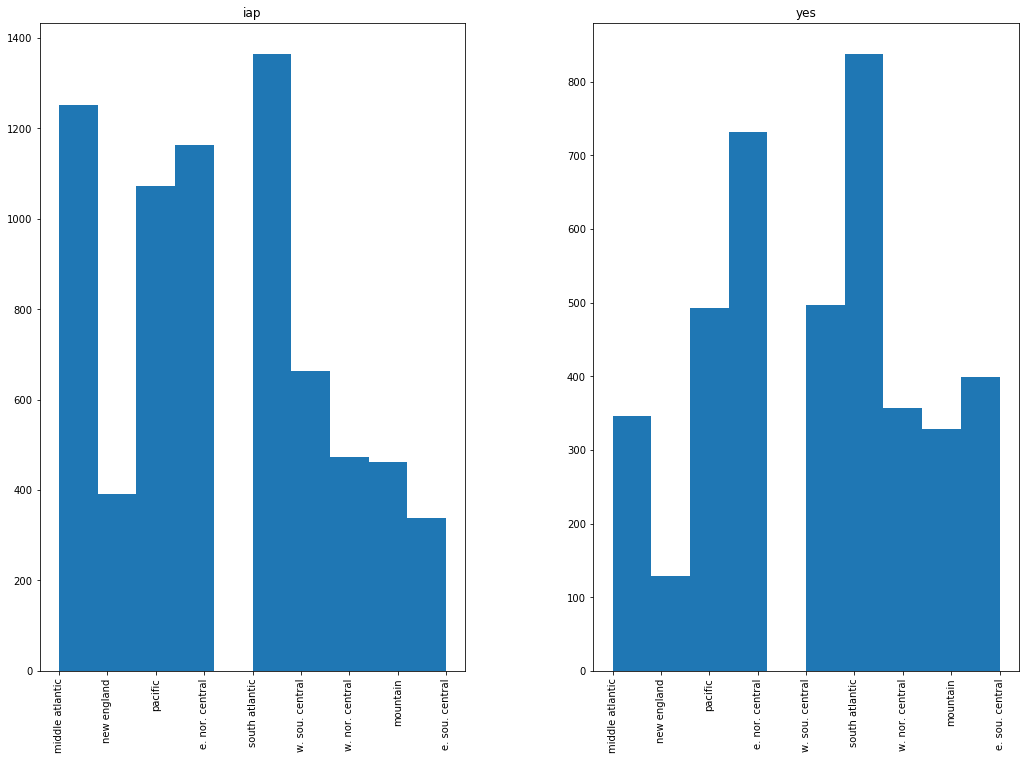

In [8]:
x = data.groupby('region').count()
data.hist(column="region", by="owngun",figsize=(17,12))
plt.show()
# Nombre de personne possédant ou non une arme à feu trié par région
# on voit qui dans les régions où le niveau de bonheur est le plus haut la majorité de personne ne possède pas d'arme à feu

In [46]:
x = nth.groupby('region').sum()['tvhours']
x
# regardons les regions qui totalisent le plus d'heures passé à regarder la télévision

region
e. nor. central    803.0
e. sou. central    267.0
middle atlantic    867.0
mountain           272.0
new england        228.0
pacific            549.0
south atlantic     895.0
w. nor. central    268.0
w. sou. central    514.0
Name: tvhours, dtype: float64

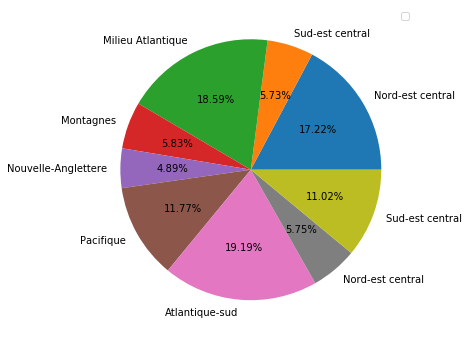

In [47]:
plt.figure(figsize=(9,6))
plt.pie(x,autopct = lambda x: str(round(x, 2)) + '%', labels = ['Nord-est central', 'Sud-est central', 'Milieu Atlantique', 'Montagnes', 'Nouvelle-Anglettere', 'Pacifique', 'Atlantique-sud', 'Nord-est central', 'Sud-est central'])
plt.legend("")
# résultat précédent sous forme de diagramme en camembert

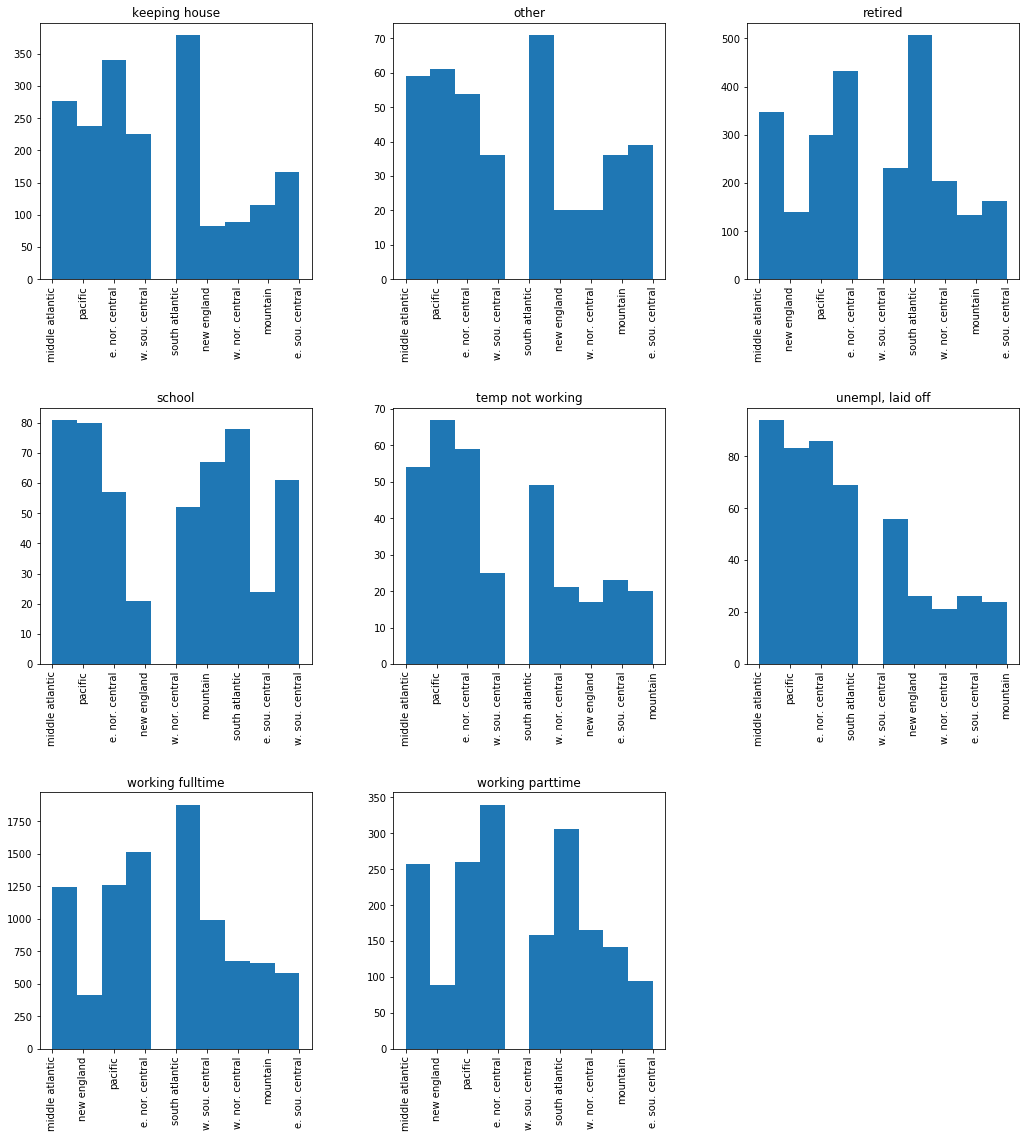

In [16]:
x = data.groupby('region').count()
data.hist(column="region", by="workstat",figsize=(17,19))
plt.show()